# Using Machine Learning to understand Online Shoppers' Purchasing   Intention

### Loading Libraries

In [1]:
# %pip install seaborn
# %pip install scipy
# %pip install matplotlip
# %pip install scikit-learn
# %pip install scikit-optimize
# %pip install joblib
# %pip install plotly
# %pip install jupyter ipython django-extensions
# %pip install pandas-profiling
# %pip install pandas
# %pip install pyspark
# %pip install numpy
# %pip install pandas-datareader
# %pip install tabulate
# %pip install ta
# %pip install lime
# %pip install shap
# %pip install keras
# %pip install tensorflow
# %pip install nltk
# %pip install wordcloud

In [2]:
#Loading libraries to visualized data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
%matplotlib inline
plt.style.use('ggplot')
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# create a Logistic Regression model with max_iter=1000
lr_model = LogisticRegression(max_iter=1000)

### Loading Dataset

In [3]:
data = pd.read_csv("online_shoppers_intention.csv")

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
print(f"Duplicated rows: {data.duplicated().sum()}")

Duplicated rows: 0


In [6]:
# remove duplicate rows
data = data.drop_duplicates()

# write updated DataFrame to new CSV file
data.to_csv("online_shoppers_intention.csv", index=False)

### Data Inspection

In [7]:
data.shape

(12205, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [9]:
#Display descriptive static
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12205.0,NaN,NaN,NaN,2.338878,3.330436,0.0,0.0,1.0,4.0,27.0
Administrative_Duration,12205.0,NaN,NaN,NaN,81.646331,177.491845,0.0,0.0,9.0,94.7,3398.75
Informational,12205.0,NaN,NaN,NaN,0.508726,1.275617,0.0,0.0,0.0,0.0,24.0
Informational_Duration,12205.0,NaN,NaN,NaN,34.825454,141.424807,0.0,0.0,0.0,0.0,2549.375
ProductRelated,12205.0,NaN,NaN,NaN,32.045637,44.593649,0.0,8.0,18.0,38.0,705.0
ProductRelated_Duration,12205.0,NaN,NaN,NaN,1206.982457,1919.6014,0.0,193.0,608.942857,1477.154762,63973.52223
BounceRates,12205.0,NaN,NaN,NaN,0.02037,0.045255,0.0,0.0,0.002899,0.016667,0.2
ExitRates,12205.0,NaN,NaN,NaN,0.041466,0.046163,0.0,0.014231,0.025,0.048529,0.2
PageValues,12205.0,NaN,NaN,NaN,5.949574,18.653671,0.0,0.0,0.0,0.0,361.763742
SpecialDay,12205.0,NaN,NaN,NaN,0.061942,0.199666,0.0,0.0,0.0,0.0,1.0


### Data Cleaning

In [10]:
print(f"Missing values in each variable: \n{data.isnull().sum()}")

Missing values in each variable: 
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [11]:
print(f"Duplicated rows: {data.duplicated().sum()}")

Duplicated rows: 0


### Data Type Fixing

In [12]:
data.Revenue = data.Revenue.astype('int')
data.Weekend = data.Weekend.astype('int')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

### Target Variable Analysis

In [14]:
# Display value count of target variable.
data['Revenue'].value_counts()

Revenue
0    10297
1     1908
Name: count, dtype: int64

In [15]:
# Percent breakdown of the Revenue rates.
online_rate = data['Revenue'].value_counts()/data.shape[0]
print(online_rate)

Revenue
0    0.843671
1    0.156329
Name: count, dtype: float64


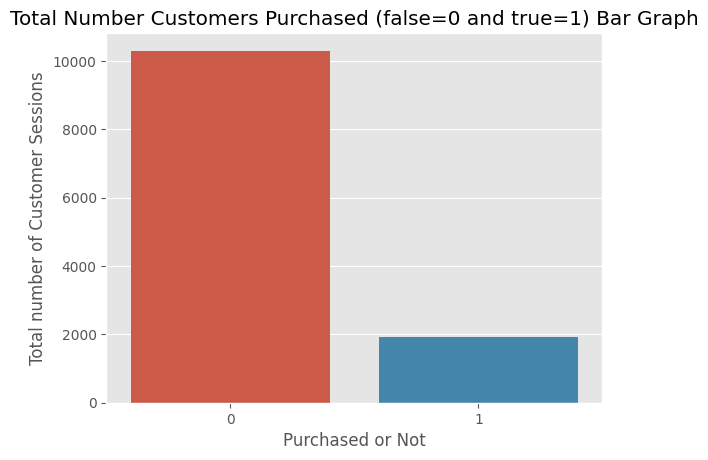

In [16]:
# Create bar graph of the Revenue.
sns.countplot(x ='Revenue', data = data)
plt.xlabel('Purchased or Not')
plt.ylabel('Total number of Customer Sessions')
plt.title('Total Number Customers Purchased (false=0 and true=1) Bar Graph')
plt.show()

### Exploratory Data Analysis(EDA)

an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

In [17]:
# matrix = np.triu(data.corr())
# fig, ax = plt.subplots(figsize=(12,12))
# sns.heatmap(data.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='cool')
# plt.show()

From the above heatmap, we observe the following:

-In general, there is very little correlation among the different features in our dataset.

-The very few cases of high correlation (|corr| >= 0.7) are:

    -ExitRates & BounceRates (0.9).
    -ProductRelated & ProductRelated_Duration (0.9).
    
-Moderate Correlations (0.3 < |corr| < 0.7):

     -Among the following features: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration.
    -Between PageValues and Revenue.
    


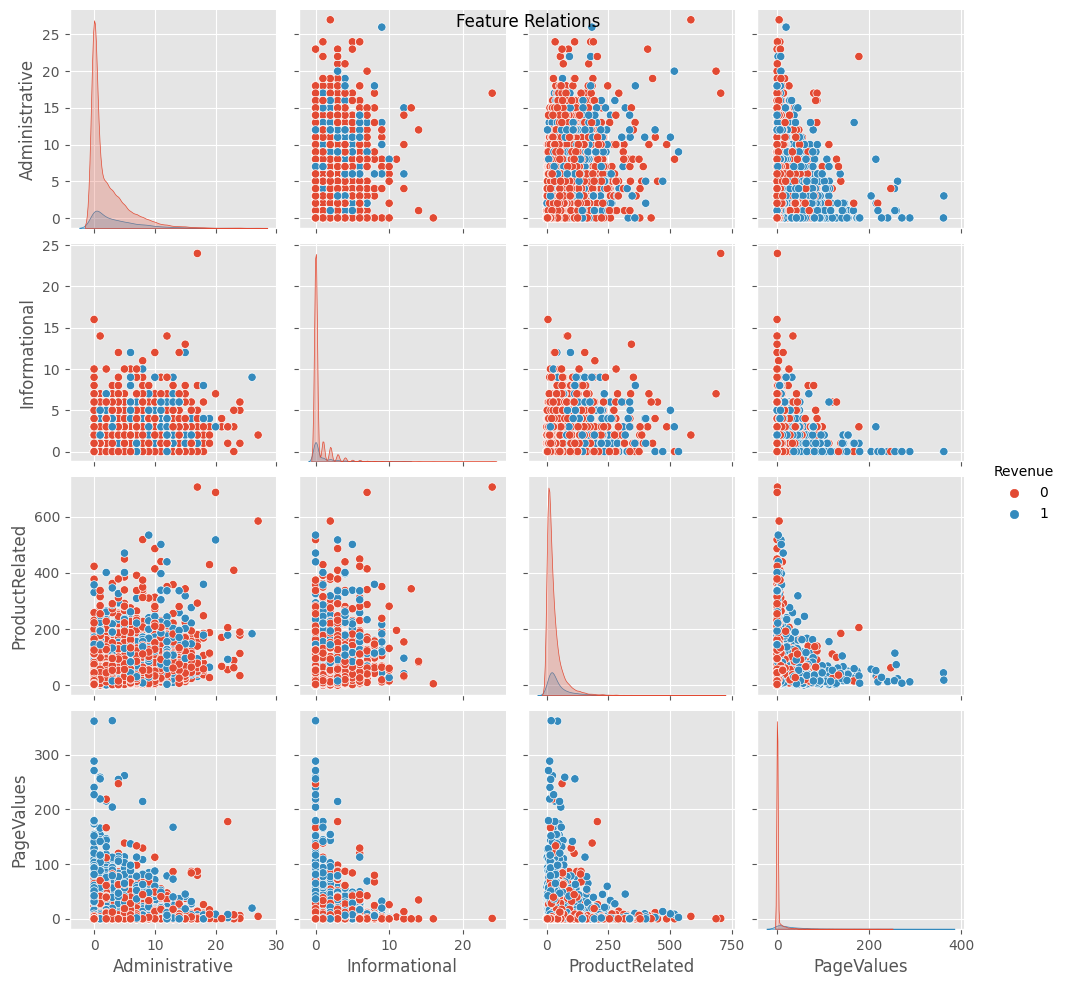

In [18]:
g1 = sns.pairplot(data[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 
                        'Revenue']], hue='Revenue')
g1.fig.suptitle('Feature Relations')
plt.show()

From pairplort above we can know that:

-A strong negative correlation between PageValues and other features shown.


### Web Pages Analysis

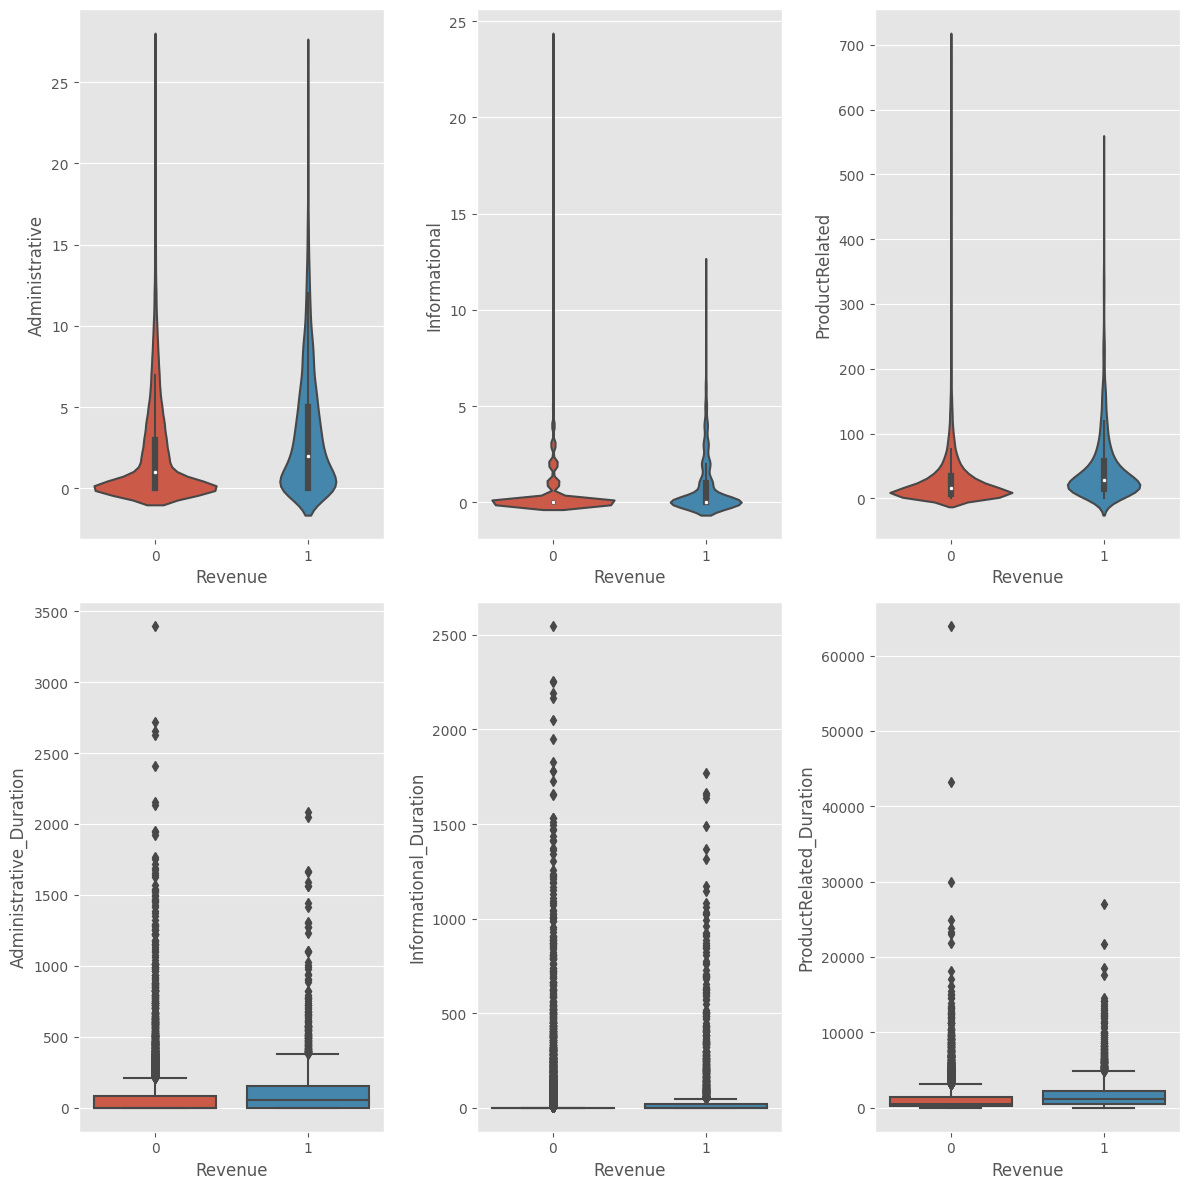

In [19]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=data, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=data, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=data, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=data, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=data, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=data, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

Boxplot above show that :

-Visitors tend to visit webside and spend less time if they dont want to purchase something

-Number of product related pages, and the time spent on them, is way higher than that for account related or informational pages.



### Page Metrics Analysis

C:\Users\Ee\AppData\Local\Temp\ipykernel_41556\1159340205.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Ee\AppData\Local\Temp\ipykernel_41556\1159340205.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Ee\AppData\Local\Temp\ipykernel_41556\1159340205.py:9: UserWarning:



`distplot` is a deprec

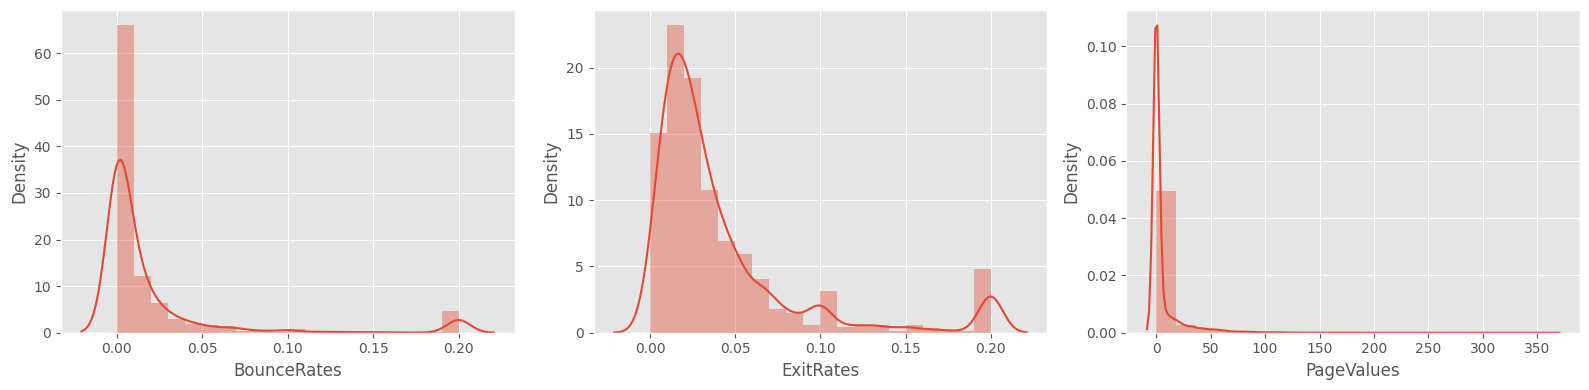

In [20]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(data['BounceRates'], bins=20, ax=ax1)
sns.distplot(data['ExitRates'], bins=20, ax=ax2)
sns.distplot(data['PageValues'], bins=20, ax=ax3)

plt.tight_layout()
plt.show()

From the above visualizations of 3 google analytics metrics, we can conclude: 
- *BounceRates* & *PageValues* do not follow a normal distribution. 
- All 3 features have distributions that are skewed right. 
- All 3 distributions have a lot of outliers. 
- The average bounce and exit rates of most of our data points is low, which is good, since high rates identicate that visitors are not engaging with the website. 
- Exit rate has more high values than bounce rate, which makes sense, where transaction confirmation pages for example will cause the average exit rate to increase. 
- Bounce rate ==> the percentage where the first page visited was the only page visited in that session. 
- Exit rate of a page ==> The percentage where that page was the last page visited in the session, out of all visits to that page. 

#### Visitor Analysis

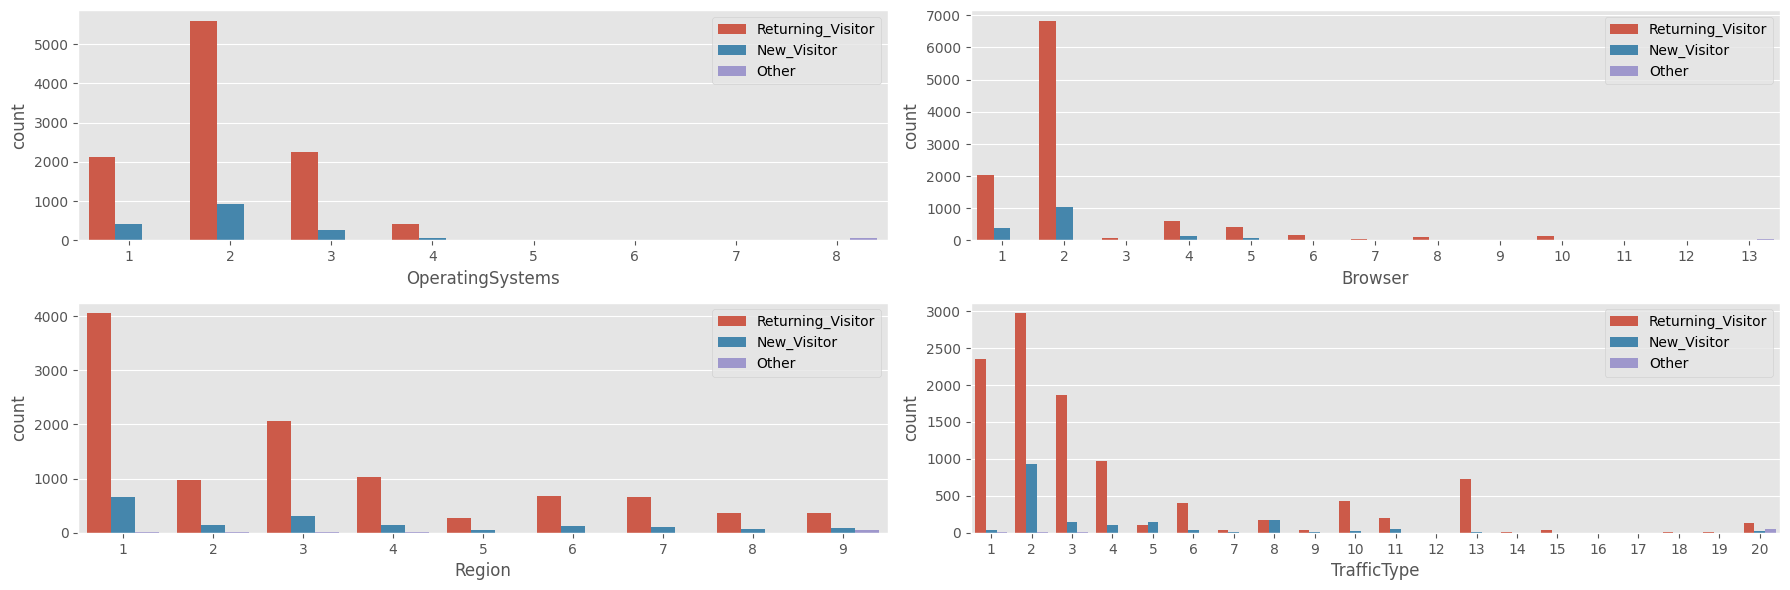

In [21]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=data, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=data, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=data, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=data, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

- There is 1 Operating System that is respond to at least 6500 example in the dataset, 4 out of 8 Operating System are respond of a very small number (<200) of examople in the dataset.

- In Brosers, also have a dominate browser and other browsers that are rarely used by visitors.

- Region are quite balance compare to other dataset.

- Traffic type are very diverse but some of trafic type didnt used by visitors.


### Visit Date Analysis

To know when is the most visitors visit and making purchase 

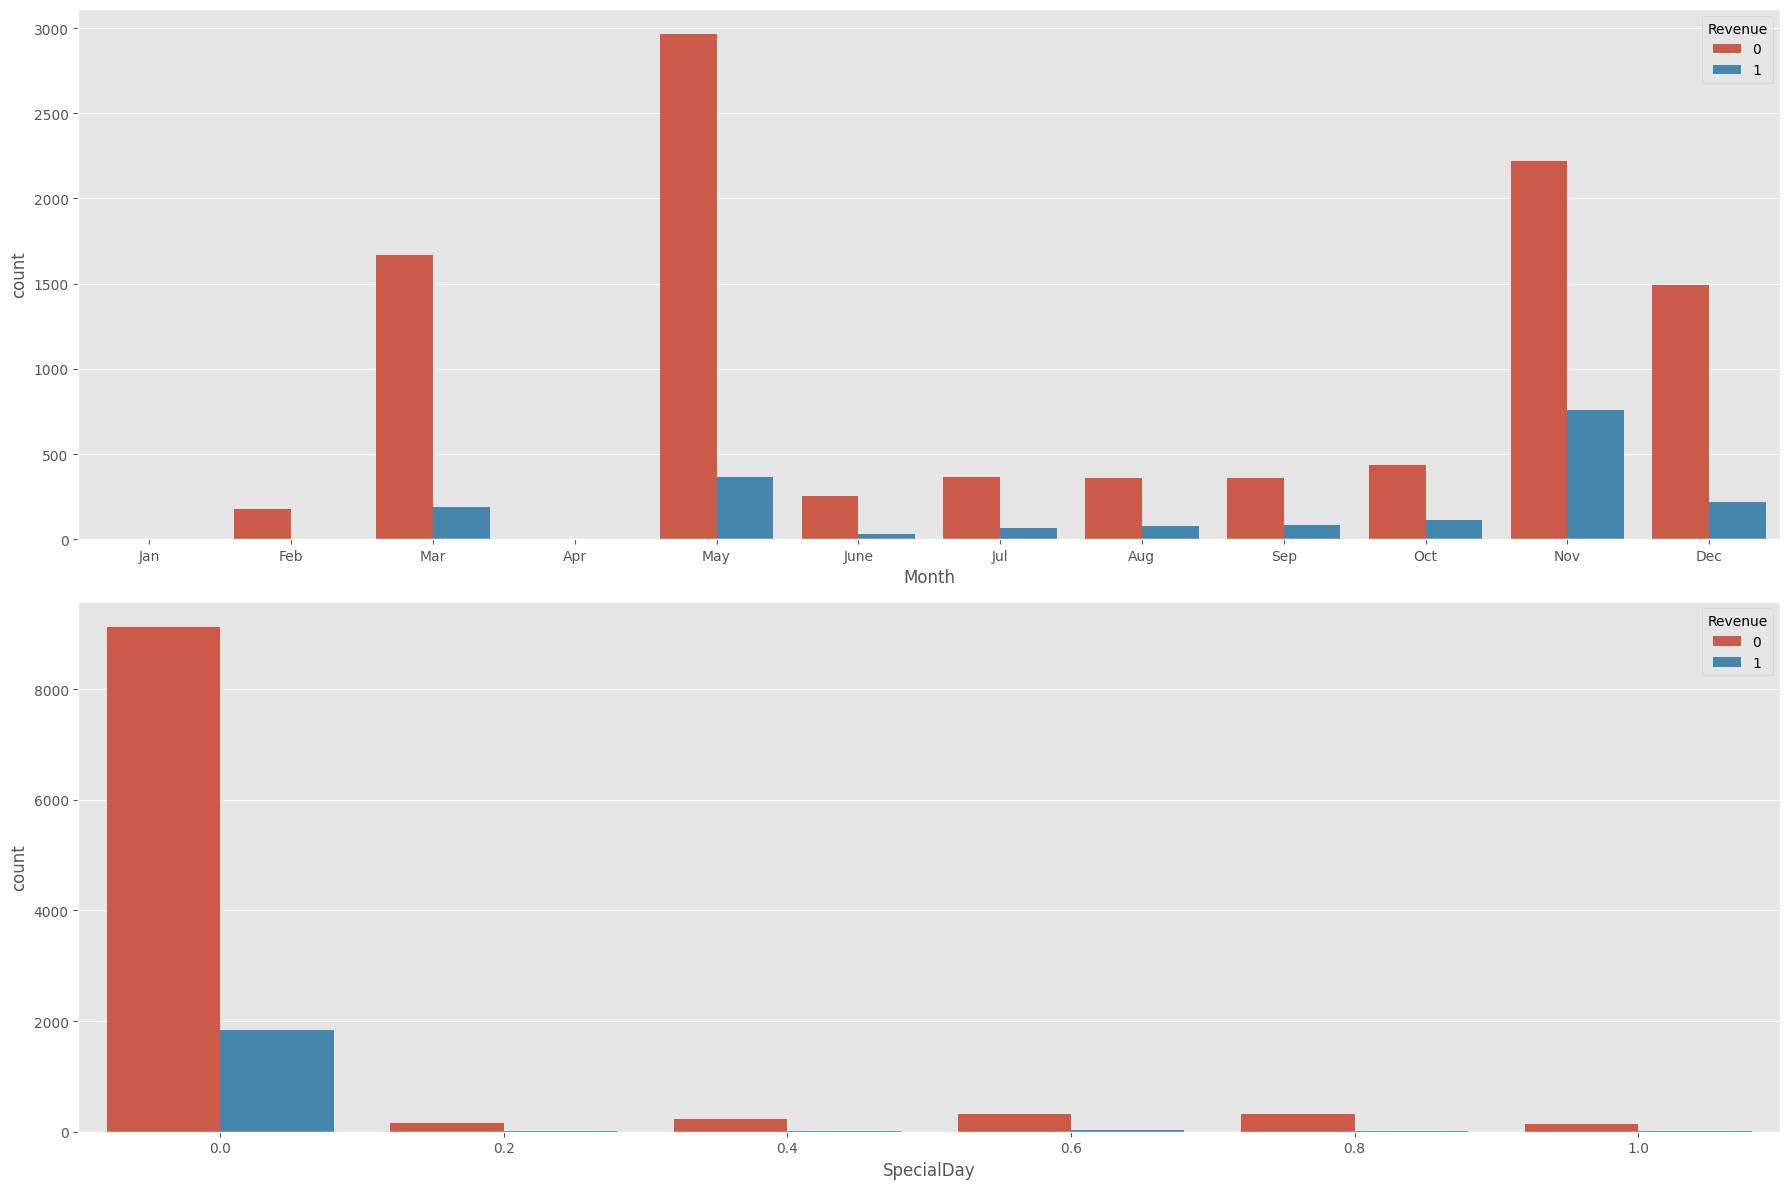

In [22]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=data, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=data, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()


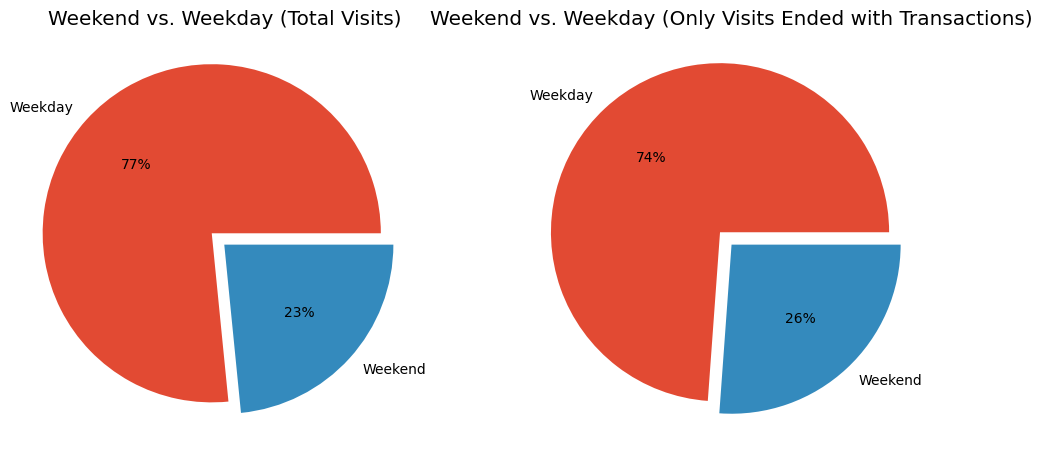

In [23]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(data['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(data[data['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

- January and Apirl have no visit.

- March and May have lots of visit, May is month of most visit. But the transictions made are not the same level.

- Most comform transaction happened on November.

- The closer with special day , more comform transaction is happened.

- Most comform transaction happened on special day.

- Weekend didnt affect number of visit or transaction, it only increase little compare weekdays to weekend.

### Data Pre-Processing


To making data ready for model training:

- Month and VisitoType transform to numeric value

- Spliting data into training, validation, and testing parts (70%/15%/15%), while separating Revenue column, where it will be used as our labels.


In [24]:
dff = pd.concat([data,pd.get_dummies(data['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
dff = pd.concat([dff,pd.get_dummies(dff['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12205 non-null  int64  
 1   Administrative_Duration        12205 non-null  float64
 2   Informational                  12205 non-null  int64  
 3   Informational_Duration         12205 non-null  float64
 4   ProductRelated                 12205 non-null  int64  
 5   ProductRelated_Duration        12205 non-null  float64
 6   BounceRates                    12205 non-null  float64
 7   ExitRates                      12205 non-null  float64
 8   PageValues                     12205 non-null  float64
 9   SpecialDay                     12205 non-null  float64
 10  OperatingSystems               12205 non-null  int64  
 11  Browser                        12205 non-null  int64  
 12  Region                         12205 non-null 

In [25]:
dff.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


### Data Split

In [26]:
# Define X and y.
y = dff['Revenue']
X = dff.drop(['Revenue'], axis=1)



In [27]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

Data Subset:

- Train data (X_train) and trin labels (y_train) ==> 70%

- Validation data (X_val) and validation labels (y_val) ==> 15%

- Test data (X_test) and test labels (y)test) ==> 15%

### Data Scaling

Scaling to use to train , validate adn test models that will benefit from feature scaling.

In [28]:
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

### Model Building

#### Naive Bayes

The reason I choose Naiv Bayes is because its ability to handle high-dimensional data sets since some of our features are normally distributed, even though other features don't follow a normal distribution.

In [29]:
nbm = GaussianNB()
nbm.fit(X_train,y_train)
nbm_pred = nbm.predict(X_val)

print('Gaussian Naive Bayes Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, nbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, nbm_pred))
print('Precision       : ', metrics.precision_score(y_val, nbm_pred))
print('Recall          : ', metrics.recall_score(y_val, nbm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, nbm_pred))

Gaussian Naive Bayes Performance:
---------------------------------
Accuracy        :  0.7908246859639542
F1 Score        :  0.503242542153048
Precision       :  0.4226579520697168
Recall          :  0.6217948717948718
Confusion Matrix:
  [[1254  265]
 [ 118  194]]


Naive Bayes result is less thsn desirable, one reason might be the Gaussian distribution assumption, which for sure does not fit all of the features in our dataset.

#### KNN


K-Nearest Neighbors (KNN) is a machine learning algorithm used for both classification and regression tasks. It is a non-parametric algorithm, which means it does not make any assumptions about the underlying distribution of the data.

In [30]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',leaf_size=30,p=2) #default values
knn.fit(Xsc_train,y_train)
knn_pred = knn.predict(Xsc_val)

print('K-Nearest Neighbor Initial Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_pred))

K-Nearest Neighbor Initial Performance:
---------------------------------------
Accuracy        :  0.8563626433642818
F1 Score        :  0.44161358811040335
Precision       :  0.6540880503144654
Recall          :  0.3333333333333333
Confusion Matrix:
  [[1464   55]
 [ 208  104]]


Compared to Naive Bayes, KNN's initial model causes a considerable increase in accuracy , with a decrease in F1 Scire and recall. Now we will try increase its performance even more with hyper-parameter tuning via grid search.

#### KNN Tuning

We will be tuning : 
- leaf_size: Leaf size can affect the speed and the memory required to store the tree.

- n_neighbors: Number of neighbors to use

- p: determines the distance metric to be used: p=1 ==> manhattan_distance, and p=2 ==> euclidean_distance

- weights: weight function used in prediction

In [31]:
knn_param_grid = {'n_neighbors': list(range(1,30)), 
                  'leaf_size': [1,10,20,30,40,50], 
                  'p': [1,2],
                  'weights': ['uniform','distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        knn_param_grid,
                        verbose=3)

In [32]:
knn_grid.fit(Xsc_train,y_train)

Fitting 5 folds for each of 696 candidates, totalling 3480 fits
[CV 1/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.838 total time=   0.0s
[CV 2/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.845 total time=   0.0s
[CV 3/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 5/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 1/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.838 total time=   0.0s
[CV 2/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.845 total time=   0.0s
[CV 3/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.846 total time=   0.0s
[CV 4/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 5/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.850 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=3)

In [33]:
knn_grid.best_params_

{'leaf_size': 1, 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}

In [34]:
knn_grid.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=15, weights='distance')

In [35]:
knn_grid_pred = knn_grid.predict(Xsc_val)

In [36]:
print('K-Nearest Neighbor Tuned Performance:')
print('-------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_grid_pred))

K-Nearest Neighbor Tuned Performance:
-------------------------------------
Accuracy        :  0.8574549426542872
F1 Score        :  0.38004750593824227
Precision       :  0.7339449541284404
Recall          :  0.2564102564102564
Confusion Matrix:
  [[1490   29]
 [ 232   80]]


There is little change for the KNN performance after hyper parameters tuning. 

#### Random Forest

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

In [37]:
rfm = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True) #default parameters
rfm.fit(X_train,y_train)
rfm_pred = rfm.predict(X_val)

print('Random Forest initial Performance:')
print('----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_pred))

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Random Forest initial Performance:
----------------------------------
Accuracy        :  0.894593118514473
F1 Score        :  0.6309751434034416
Precision       :  0.7819905213270142
Recall          :  0.5288461538461539
Confusion Matrix:
  [[1473   46]
 [ 147  165]]


The random forest classifier (with default parameter values) give us higher accuracy and F1 score than all other classifiers tested so far. Next, we will try improving its performance (especially the recall) by tuning its hyper-parameters.

### Random Forest Tuning

Scikit-Learn documentation tells us the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features). We will try adjusting the following set of hyperparameters:

- n_estimators = number of trees in the foreset

- max_features = max number of features considered for splitting a node

- max_depth = max number of levels in each decision tree

- min_samples_split = min number of data points placed in a node before the node is split

- min_samples_leaf = min number of data points allowed in a leaf node

Due to the large number of parameters and parameter values to be tested, we will use random search this time.

In [38]:
rfm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50,100],
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15]} 

rfm_grid = RandomizedSearchCV(RandomForestClassifier(),
                        rfm_param_grid,
                        n_iter=100,
                        n_jobs= -1)

In [39]:
rfm_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 100],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 7, 15],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [10, 80, 200, 800, 2000,
                                                         5000]})

In [40]:
rfm_grid.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50}

In [41]:
rfm_grid.best_estimator_

RandomForestClassifier(max_depth=50, min_samples_leaf=2, n_estimators=80)

In [42]:
rfm_grid = RandomForestClassifier(n_estimators=5000,
    criterion='gini',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=7,
    max_features='sqrt',
    bootstrap=True) #default parameters
rfm_grid.fit(X_train,y_train)
rfm_grid_pred = rfm_grid.predict(X_val)

print('Random Forest Tuned Performance:')
print('--------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_grid_pred))

Random Forest Tuned Performance:
--------------------------------
Accuracy        :  0.8951392681594756
F1 Score        :  0.633587786259542
Precision       :  0.7830188679245284
Recall          :  0.532051282051282
Confusion Matrix:
  [[1473   46]
 [ 146  166]]


### Logistic Regression

In [43]:
lrm = LogisticRegression(C=1.0,solver='lbfgs',) #default parameters
lrm.fit(X_train,y_train)
lrm_pred = lrm.predict(X_val)

print('Logistic Regression initial Performance:')
print('----------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_pred))

Logistic Regression initial Performance:
----------------------------------------
Accuracy        :  0.874385581649372
F1 Score        :  0.5106382978723405
Precision       :  0.759493670886076
Recall          :  0.38461538461538464
Confusion Matrix:
  [[1481   38]
 [ 192  120]]


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#### Logistic Regression Tuning

In [44]:
lrm_param_grid = {'C': [0.01, 0.1, 1, 10, 100],  
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']} 
lrm_grid = GridSearchCV(LogisticRegression(),
                        lrm_param_grid,
                        refit=True,
                        verbose=3)

In [45]:
lrm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..........C=0.01, solver=newton-cg;, score=0.872 total time=   0.1s
[CV 2/5] END ..........C=0.01, solver=newton-cg;, score=0.878 total time=   0.1s
[CV 3/5] END ..........C=0.01, solver=newton-cg;, score=0.883 total time=   0.1s
[CV 4/5] END ..........C=0.01, solver=newton-cg;, score=0.881 total time=   0.1s
[CV 5/5] END ..........C=0.01, solver=newton-cg;, score=0.875 total time=   0.1s
[CV 1/5] END ..............C=0.01, solver=lbfgs;, score=0.875 total time=   0.0s
[CV 2/5] END ..............C=0.01, solver=lbfgs;, score=0.871 total time=   0.0s
[CV 3/5] END ..............C=0.01, solver=lbfgs;, score=0.882 total time=   0.0s
[CV 4/5] END ..............C=0.01, solver=lbfgs;, score=0.888 total time=   0.0s
[CV 5/5] END ..............C=0.01, solver=lbfgs;, score=0.872 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV 1/5] END ................C=0.01, solver=sag;, score=0.847 total time=   0.0s
[CV 2/5] END ................C=0.01, solver=sag;, score=0.860 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END ................C=0.01, solver=sag;, score=0.848 total time=   0.0s
[CV 4/5] END ................C=0.01, solver=sag;, score=0.849 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END ................C=0.01, solver=sag;, score=0.848 total time=   0.0s
[CV 1/5] END ...............C=0.01, solver=saga;, score=0.846 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END ...............C=0.01, solver=saga;, score=0.854 total time=   0.0s
[CV 3/5] END ...............C=0.01, solver=saga;, score=0.847 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END ...............C=0.01, solver=saga;, score=0.848 total time=   0.0s
[CV 5/5] END ...............C=0.01, solver=saga;, score=0.847 total time=   0.0s
[CV 1/5] END ...........C=0.1, solver=newton-cg;, score=0.874 total time=   0.1s
[CV 2/5] END ...........C=0.1, solver=newton-cg;, score=0.877 total time=   0.1s
[CV 3/5] END ...........C=0.1, solver=newton-cg;, score=0.885 total time=   0.1s
[CV 4/5] END ...........C=0.1, solver=newton-cg;, score=0.885 total time=   0.1s
[CV 5/5] END ...........C=0.1, solver=newton-cg;, score=0.875 total time=   0.1s
[CV 1/5] END ...............C=0.1, solver=lbfgs;, score=0.871 total time=   0.0s
[CV 2/5] END ...............C=0.1, solver=lbfgs;, score=0.881 total time=   0.0s
[CV 3/5] END ...............C=0.1, solver=lbfgs;, score=0.884 total time=   0.0s
[CV 4/5] END ...............C=0.1, solver=lbfgs;, score=0.883 total time=   0.0s
[CV 5/5] END ...............C=0.1, solver=lbfgs;, score=0.876 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV 1/5] END .................C=0.1, solver=sag;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=0.1, solver=sag;, score=0.860 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END .................C=0.1, solver=sag;, score=0.848 total time=   0.0s
[CV 4/5] END .................C=0.1, solver=sag;, score=0.849 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END .................C=0.1, solver=sag;, score=0.848 total time=   0.0s
[CV 1/5] END ................C=0.1, solver=saga;, score=0.846 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END ................C=0.1, solver=saga;, score=0.854 total time=   0.0s
[CV 3/5] END ................C=0.1, solver=saga;, score=0.847 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END ................C=0.1, solver=saga;, score=0.848 total time=   0.0s
[CV 5/5] END ................C=0.1, solver=saga;, score=0.847 total time=   0.0s
[CV 1/5] END .............C=1, solver=newton-cg;, score=0.875 total time=   0.2s
[CV 2/5] END .............C=1, solver=newton-cg;, score=0.879 total time=   0.2s
[CV 3/5] END .............C=1, solver=newton-cg;, score=0.885 total time=   0.2s
[CV 4/5] END .............C=1, solver=newton-cg;, score=0.888 total time=   0.1s
[CV 5/5] END .............C=1, solver=newton-cg;, score=0.875 total time=   0.2s
[CV 1/5] END .................C=1, solver=lbfgs;, score=0.871 total time=   0.0s
[CV 2/5] END .................C=1, solver=lbfgs;, score=0.876 total time=   0.0s
[CV 3/5] END .................C=1, solver=lbfgs;, score=0.881 total time=   0.0s
[CV 4/5] END .................C=1, solver=lbfgs;, score=0.883 total time=   0.0s
[CV 5/5] END .................C=1, solver=lbfgs;, score=0.877 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV 1/5] END ...................C=1, solver=sag;, score=0.847 total time=   0.0s
[CV 2/5] END ...................C=1, solver=sag;, score=0.860 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END ...................C=1, solver=sag;, score=0.848 total time=   0.0s
[CV 4/5] END ...................C=1, solver=sag;, score=0.849 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END ...................C=1, solver=sag;, score=0.848 total time=   0.0s
[CV 1/5] END ..................C=1, solver=saga;, score=0.846 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END ..................C=1, solver=saga;, score=0.854 total time=   0.0s
[CV 3/5] END ..................C=1, solver=saga;, score=0.847 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END ..................C=1, solver=saga;, score=0.848 total time=   0.0s
[CV 5/5] END ..................C=1, solver=saga;, score=0.847 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning:

The line search algorithm did not converge



[CV 1/5] END ............C=10, solver=newton-cg;, score=0.876 total time=   0.4s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



[CV 2/5] END ............C=10, solver=newton-cg;, score=0.881 total time=   0.3s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



[CV 3/5] END ............C=10, solver=newton-cg;, score=0.887 total time=   0.3s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



[CV 4/5] END ............C=10, solver=newton-cg;, score=0.888 total time=   0.3s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV 5/5] END ............C=10, solver=newton-cg;, score=0.876 total time=   0.3s
[CV 1/5] END ................C=10, solver=lbfgs;, score=0.872 total time=   0.0s
[CV 2/5] END ................C=10, solver=lbfgs;, score=0.878 total time=   0.0s
[CV 3/5] END ................C=10, solver=lbfgs;, score=0.884 total time=   0.0s
[CV 4/5] END ................C=10, solver=lbfgs;, score=0.885 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END ................C=10, solver=lbfgs;, score=0.878 total time=   0.0s
[CV 1/5] END ..................C=10, solver=sag;, score=0.847 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END ..................C=10, solver=sag;, score=0.860 total time=   0.0s
[CV 3/5] END ..................C=10, solver=sag;, score=0.848 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END ..................C=10, solver=sag;, score=0.849 total time=   0.0s
[CV 5/5] END ..................C=10, solver=sag;, score=0.848 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END .................C=10, solver=saga;, score=0.846 total time=   0.0s
[CV 2/5] END .................C=10, solver=saga;, score=0.854 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END .................C=10, solver=saga;, score=0.847 total time=   0.0s
[CV 4/5] END .................C=10, solver=saga;, score=0.848 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END .................C=10, solver=saga;, score=0.847 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



[CV 1/5] END ...........C=100, solver=newton-cg;, score=0.877 total time=   0.3s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



[CV 2/5] END ...........C=100, solver=newton-cg;, score=0.882 total time=   0.3s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



[CV 3/5] END ...........C=100, solver=newton-cg;, score=0.887 total time=   0.3s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



[CV 4/5] END ...........C=100, solver=newton-cg;, score=0.886 total time=   0.3s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV 5/5] END ...........C=100, solver=newton-cg;, score=0.879 total time=   0.3s
[CV 1/5] END ...............C=100, solver=lbfgs;, score=0.871 total time=   0.0s
[CV 2/5] END ...............C=100, solver=lbfgs;, score=0.877 total time=   0.0s
[CV 3/5] END ...............C=100, solver=lbfgs;, score=0.883 total time=   0.0s
[CV 4/5] END ...............C=100, solver=lbfgs;, score=0.885 total time=   0.0s
[CV 5/5] END ...............C=100, solver=lbfgs;, score=0.874 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END .................C=100, solver=sag;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=100, solver=sag;, score=0.860 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END .................C=100, solver=sag;, score=0.848 total time=   0.0s
[CV 4/5] END .................C=100, solver=sag;, score=0.849 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END .................C=100, solver=sag;, score=0.848 total time=   0.0s
[CV 1/5] END ................C=100, solver=saga;, score=0.846 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END ................C=100, solver=saga;, score=0.854 total time=   0.0s
[CV 3/5] END ................C=100, solver=saga;, score=0.847 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END ................C=100, solver=saga;, score=0.848 total time=   0.0s
[CV 5/5] END ................C=100, solver=saga;, score=0.847 total time=   0.0s


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             verbose=3)

In [46]:
lrm_grid.best_params_

{'C': 100, 'solver': 'newton-cg'}

In [47]:
lrm_grid.best_estimator_

LogisticRegression(C=100, solver='newton-cg')

In [48]:
lrm_grid = LogisticRegression(C=10,solver='newton-cg',) #default parameters
lrm_grid.fit(X_train,y_train)
lrm_grid_pred = lrm_grid.predict(X_val)

print('Logistic Regression Tuned Performance:')
print('--------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_grid_pred))

Logistic Regression Tuned Performance:
--------------------------------------
Accuracy        :  0.872200983069361
F1 Score        :  0.4823008849557522
Precision       :  0.7785714285714286
Recall          :  0.34935897435897434
Confusion Matrix:
  [[1488   31]
 [ 203  109]]


c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning:

The line search algorithm did not converge

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



### AdABoost

In [49]:
base_estimator = DecisionTreeClassifier()

# Create the AdaBoost classifier with the base estimator
abm = AdaBoostClassifier(base_estimator=base_estimator,
                         n_estimators=50,
                         learning_rate=1.0,
                         algorithm='SAMME.R',
                         random_state=None)

# Fit the classifier to your training data
abm.fit(X_train, y_train)

# Make predictions on the validation data
abm_pred = abm.predict(X_val)

# Evaluate the performance of the classifier
print('AdaBoost initial Performance:')
print('-----------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, abm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, abm_pred))
print('Precision       : ', metrics.precision_score(y_val, abm_pred))
print('Recall          : ', metrics.recall_score(y_val, abm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, abm_pred))

c:\Users\Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



AdaBoost initial Performance:
-----------------------------
Accuracy        :  0.849808847624249
F1 Score        :  0.56
Precision       :  0.5591054313099042
Recall          :  0.5608974358974359
Confusion Matrix:
  [[1381  138]
 [ 137  175]]


#### AdABoost Tuning

In [50]:
abm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'learning_rate':[0.01,0.1,0.5,1]} 

abm_grid = RandomizedSearchCV(AdaBoostClassifier(),
                        abm_param_grid)

In [51]:
abm_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'n_estimators': [10, 80, 200, 800, 2000,
                                                         5000]})

In [52]:
abm_grid.best_params_

{'n_estimators': 80, 'learning_rate': 0.1}

In [53]:
abm_grid.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=80)

In [54]:
# Create the AdaBoost classifier with the tuned parameters
abm_grid = AdaBoostClassifier(n_estimators=80,
                              learning_rate=0.5,
                              algorithm='SAMME.R',
                              random_state=None)

# Fit the classifier to your training data
abm_grid.fit(X_train, y_train)

# Make predictions on the validation data
abm_grid_pred = abm_grid.predict(X_val)

# Evaluate the performance of the classifier
print('AdaBoost Tuned Performance:')
print('---------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, abm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, abm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, abm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, abm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, abm_grid_pred))

AdaBoost Tuned Performance:
---------------------------
Accuracy        :  0.874385581649372
F1 Score        :  0.5848375451263538
Precision       :  0.6694214876033058
Recall          :  0.5192307692307693
Confusion Matrix:
  [[1439   80]
 [ 150  162]]


### Result

Table below are result of 3 different classification model tested.

| Classifier | Accuracy | F1-Score | Precision | Recall |
|:-----------|:---------|:---------|:----------|:-------|
|Naive Bayes |0.791     |0.503     | 0.422    |0.621  |
|KNN|0.857|0.380|0.733|0.256|
|Random Forest|0.895|0.634|0.780|0.535|
|Logistic Regression|0.87|0.48|0.78|0.35|
|ADA Boost| 0.87|0.58|0.67|0.52|


### ROC Curves

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.This curve plots two parameters: True Positive Rate. False Positive Rate

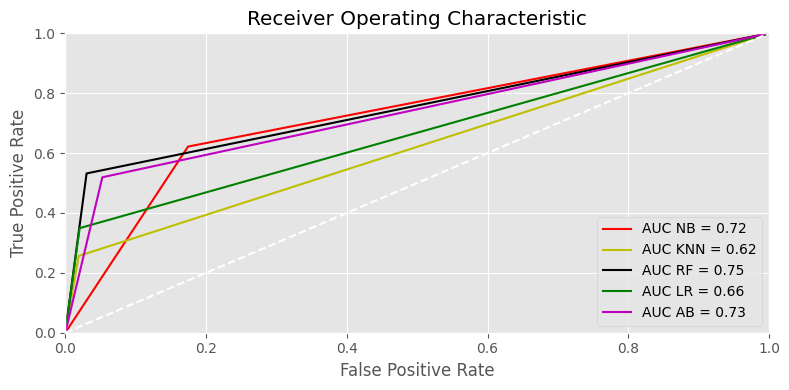

In [55]:
fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(y_val, nbm_pred)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_val, knn_grid_pred)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
fpr_rfm, tpr_rfm, threshold_rfm = metrics.roc_curve(y_val, rfm_grid_pred)
roc_auc_rfm = metrics.auc(fpr_rfm, tpr_rfm)
fpr_lrm, tpr_lrm, threshold_lrm = metrics.roc_curve(y_val, lrm_grid_pred)
roc_auc_lrm = metrics.auc(fpr_lrm, tpr_lrm)
fpr_abm, tpr_abm, threshold_abm = metrics.roc_curve(y_val, abm_grid_pred)
roc_auc_abm = metrics.auc(fpr_abm, tpr_abm)


fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_nb, tpr_nb, 'r', label = 'AUC NB = %0.2f' % roc_auc_nb)
plt.plot(fpr_knn, tpr_knn, 'y', label = 'AUC KNN = %0.2f' % roc_auc_knn)
plt.plot(fpr_rfm, tpr_rfm, 'k', label = 'AUC RF = %0.2f' % roc_auc_rfm)
plt.plot(fpr_lrm, tpr_lrm, 'g', label = 'AUC LR = %0.2f' % roc_auc_lrm)
plt.plot(fpr_abm, tpr_abm, 'm', label = 'AUC AB = %0.2f' % roc_auc_abm)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

From all the calcuated classifier above we can konw that Random Forest have the highest performance

Random forest hyper-parameters

n_estimators: The number of decision trees in the forest. Higher values can improve performance at the cost of increased computational complexity.

max_depth: The maximum depth of each decision tree. It controls the depth of the tree and can prevent overfitting. Setting it to None allows the trees to expand until all leaves are pure or contain a minimum number of samples.

min_samples_split: The minimum number of samples required to split an internal node. Higher values prevent splitting nodes with a small number of samples, which can help prevent overfitting.

min_samples_leaf: The minimum number of samples required to be at a leaf node. Higher values can help control overfitting by preventing the creation of leaves with a small number of samples.

max_features: The number of features to consider when looking for the best split. It can be a fixed value, a fraction of features, or one of the predefined options like "sqrt" or "log2". It controls the randomness and diversity of each tree in the forest.

bootstrap: Whether bootstrap samples are used when building trees. Setting it to True enables bootstrapping, which introduces randomness and diversity in the dataset.

class_weight: Weights associated with classes. It can be set to "balanced" to automatically adjust weights inversely proportional to class frequencies. This can help address class imbalance issues.

random_state: The random seed used for random number generation. It ensures reproducibility of the results.

n_jobs: The number of parallel jobs to run for fitting and predicting. Setting it to -1 uses all available processors.

In [56]:
import pickle 

In [57]:
filename = 'Naive_Bayes.sav'
pickle.dump(nbm_pred, open(filename,'wb'))

In [58]:
loaded_model = pickle.load(open('Naive_Bayes.sav', 'rb'))

In [59]:
filename = 'KNN.sav'
pickle.dump(knn_grid_pred, open(filename,'wb'))

In [60]:
loaded_model = pickle.load(open('KNN.sav', 'rb'))

In [61]:
filename = 'Random_Forest.sav'
pickle.dump(rfm_grid_pred, open(filename,'wb'))

In [62]:
loaded_model = pickle.load(open('Random_Forest.sav', 'rb'))

In [63]:
filename = 'Logistic_Regression.sav'
pickle.dump(lrm_grid_pred, open(filename,'wb'))

In [64]:
loaded_model = pickle.load(open('Logistic_Regression.sav', 'rb'))

In [65]:
filename = 'ADA_Boosting.sav'
pickle.dump(abm_grid_pred, open(filename,'wb'))

In [66]:
loaded_model = pickle.load(open('ADA_Boosting.sav', 'rb'))

In [67]:
measuring true performance

SyntaxError: invalid syntax (4015579829.py, line 1)

In [ ]:
validation because got 3 method